<a href="https://colab.research.google.com/github/laurencefrank/Applied-Text-Mining/blob/main/ATM_P6_Wednesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applied Text Mining, Utrecht Summerschool 26 - 29 July 2021

Wednesday 28 July, practical 6

Practical 6: Deep Learning for Multiclass Text Classification

Welcome to the sixth practical of the course “Applied Text Mining”. In this practical, we will apply various deep learning models for multiclass text classification. We will work with the famous 20 Newsgroups data set from the sklearn library and will apply deep learning models on that using the Keras library.

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. It was originally collected by Ken Lang, and it has become a popular data set for experiments in text applications of machine learning techniques.

On the other hand, today we will use the Keras library, which is a deep learning and neural networks API by François Chollet's team which is capable of running on top of Tensorflow (Google), Theano or CNTK (Microsoft).

Today we will use the following libraries. Take care to have them installed!

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder

from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers, utils

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SEED = 321

1. Load the tarin and test subsets of the 20 Newsgroups data set from sklearn datasets. Remove the headers, footers and qoutes from the news article when loading data sets. Use number 321 for random_state. In order to get faster execution times for this practical we will work on a partial data set with only 5 categories out of the 20 available in the data set: ('rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med').

In [ ]:
categories = ['rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [ ]:
five_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                  categories=categories, shuffle=True, random_state=321)


In [ ]:
type(five_train)

sklearn.utils.Bunch

In [ ]:
five_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), 
                                 categories=categories, shuffle=True, random_state=321)

2. Find out about the number of news articles in train and test sets.

In [ ]:
five_train.target_names

['comp.graphics',
 'rec.sport.hockey',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.mideast']

In [ ]:
five_train.filenames.shape

(2941,)

In [ ]:
five_test.filenames.shape

(1958,)

3. Covert the train and test to dataframes.

In [ ]:
df_train = pd.DataFrame(list(zip(five_train.data, five_train.target)), columns=['text', 'label'])
df_train.head()

,text,label
0,\nDr. cheghadr bA namakand! They just wait un...,4
1,\n\n\n\n\n:) No...I was one of the lucky ones....,2
2,\n\n[After a small refresh Hasan got on the tr...,4
3,Before getting excited and implying that I am ...,4
4,I have posted disp135.zip to alt.binaries.pict...,0


In [ ]:
df_test = pd.DataFrame(list(zip(five_test.data, five_test.target)), columns=['text', 'label'])
df_test.head()

,text,label
0,"hi all, Ive applied for the class of 93 at qui...",2
1,:In article <enea1-270493135255@enea.apple.com...,2
2,"\nI don't know the answer the to this one, alt...",0
3,\n\nWe here at IBM have the same problem with ...,0
4,\nI was at an Adobe seminar/conference/propaga...,0


### Train a neural network with document-term matrix

4. In order to feed predictive deep learning models with text data, first you need to turn the text into vectors of numerical values suitable for statistical analysis. Use the binary representation with TfidfVectorizer and create document-term matrices for test and train (name them X_train and X_test).

In [ ]:
def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 


In [ ]:
tfidf = TfidfVectorizer(binary=True)

X_train = tfidf_features(df_train.text.values, flag="train")
X_test = tfidf_features(df_test.text.values, flag="test")


In [ ]:
# With CountVectorizer and without the function
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# X_train = count_vect.fit_transform(df_train.text.values)
# X_test = count_vect.transform(df_test.text.values)

In [ ]:
X_train.nnz / float(X_train.shape[0])

111.5678340700442

The extracted vectors are very sparse, with an average of 111 non-zero components by sample in a more than 37000-dimensional space (less than 0.3% non-zero features)

In [ ]:
X_test.nnz / float(X_train.shape[0])

75.78748724923496

In [ ]:
tfidf.vocabulary_

{'dr': 11831,
 'cheghadr': 7790,
 'ba': 5229,
 'namakand': 23053,
 'they': 33351,
 'just': 19216,
 'wait': 35850,
 'until': 34946,
 'are': 4507,
 'teenagers': 33019,
 'to': 33637,
 'kill': 19570,
 'them': 33280,
 'huh': 17121,
 'yup': 36995,
 'iri': 18569,
 'also': 3839,
 'granted': 15615,
 'great': 15673,
 'deal': 10311,
 'of': 24102,
 'reconstruction': 27894,
 'houses': 17031,
 'and': 4048,
 'buildings': 6819,
 'in': 17695,
 'war': 35900,
 'torn': 33751,
 'areas': 4509,
 'malaysia': 21218,
 'khak': 19512,
 'too': 33713,
 'sareshoon': 29498,
 'one': 24265,
 'the': 33264,
 'only': 24281,
 'industries': 17864,
 'we': 36023,
 'really': 27764,
 'have': 16323,
 'is': 18615,
 'construction': 9123,
 'there': 33323,
 'all': 3748,
 'these': 33341,
 'unemployed': 34686,
 'youth': 36969,
 'give': 15292,
 'money': 22531,
 'do': 11634,
 'what': 36180,
 'iranians': 18556,
 'can': 7145,
 'should': 30510,
 'be': 5586,
 'doing': 11683,
 'no': 23621,
 'was': 35945,
 'lucky': 20918,
 'ones': 24270,
 've

5. Use the LabelEncoder to create y_train and y_test from df_train.label.values and df_test.label.values respectively.

In [ ]:
# Converting the list of strings to the matrix of vectors (to be fed neural network models)
# Encode the list of newsgroups into categorical integer values

lb = LabelEncoder()
y = lb.fit_transform(df_train.label.values)
y_train = utils.np_utils.to_categorical(y)

In [ ]:
y_train.shape

(2941, 5)

In [ ]:
y = lb.transform(df_test.label.values)
y_test = utils.np_utils.to_categorical(y)

6. Use the sequential API in Keras and create a one-hidden-layer neural network. So, the first layer will be input layer with the number of features in your X_train, then one hidden layer, then one output layer. Set the number of neurons 5 in the hidden layer and activation function as relu. For the output layer you can use a softmax activation function.

The sequential API (https://www.tensorflow.org/guide/keras/sequential_model) allows you to create models layer by layer. It is limited in that it does not allow to create models that share layers or have multiple inputs or outputs.

The functional API (https://www.tensorflow.org/guide/keras/functional) allows you to create models that have a lot more flexibility as you can define models where layers connect to more than just the previous and next layers. In this way, you can connect layers to (literally) any other layer. As a result, creating complex networks such as Siamese neural networks and residual neural networks becomes possible.

In [ ]:
model = Sequential()
input_dim = X_train.shape[1]  # Number of features
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

7. The compile function defines the loss function, the optimizer and the metrics. Call this function for your neural network model with loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']. Check the summary of the model.

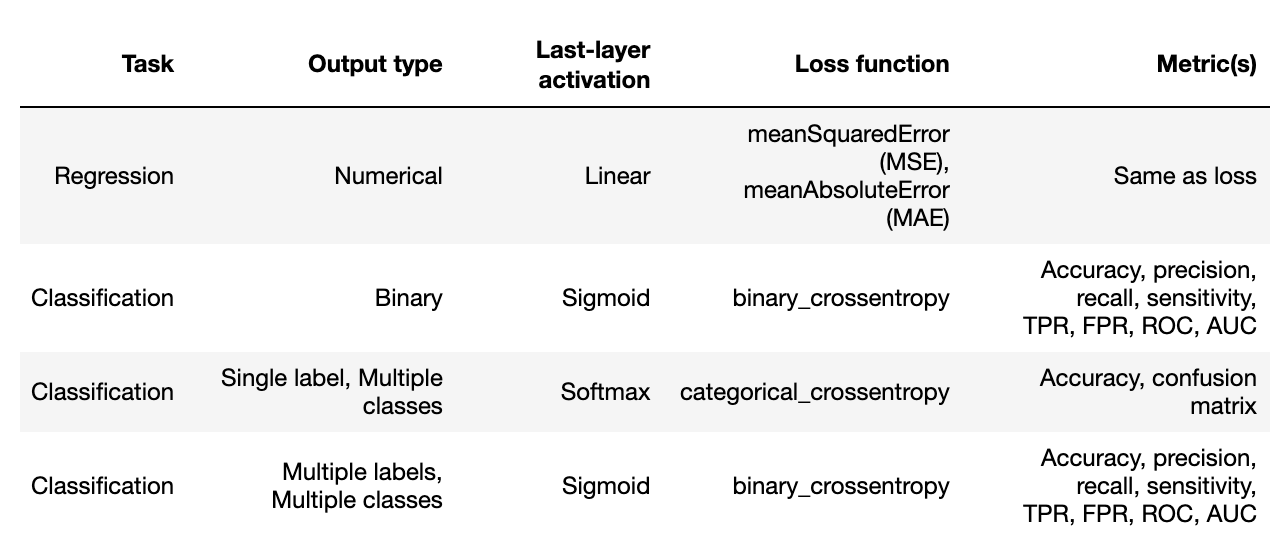

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                371490    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 371,545
Trainable params: 371,545
Non-trainable params: 0
_________________________________________________________________


8. Time to train your model! Train your model in 20 iterations. What does batch_size represent?

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512)
model.save_weights("model.h5")
print("Saved model to disk")

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


6/6 [==============================] - 14s 19ms/step - loss: 0.6917 - accuracy: 0.2637
Epoch 2/20
6/6 [==============================] - 0s 19ms/step - loss: 0.6824 - accuracy: 0.3646
Epoch 3/20
6/6 [==============================] - 0s 22ms/step - loss: 0.6726 - accuracy: 0.4137
Epoch 4/20
6/6 [==============================] - 0s 22ms/step - loss: 0.6626 - accuracy: 0.4451
Epoch 5/20
6/6 [==============================] - 0s 18ms/step - loss: 0.6515 - accuracy: 0.5095
Epoch 6/20
6/6 [==============================] - 0s 21ms/step - loss: 0.6403 - accuracy: 0.5432
Epoch 7/20
6/6 [==============================] - 0s 19ms/step - loss: 0.6288 - accuracy: 0.5776
Epoch 8/20
6/6 [==============================] - 0s 19ms/step - loss: 0.6172 - accuracy: 0.5918
Epoch 9/20
6/6 [==============================] - 0s 19ms/step - loss: 0.6042 - accuracy: 0.6225
Epoch 10/20
6/6 [==============================] - 0s 19ms/step - loss: 0.5899 - accuracy: 0.6518
Epoch 11/20
6/6 [======================

Note that if you rerun the fit() method, you will start off with the computed weights from the previous training. Make sure to call clear_session() before you start training the model again:

from keras.backend import clear_session
clear_session()

9. Plot the accuracy and loss of your trained model.

dict_keys(['loss', 'accuracy'])


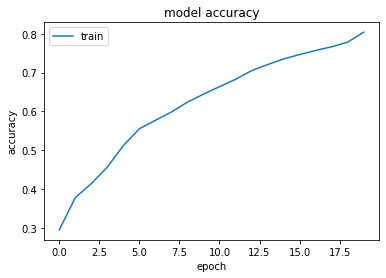

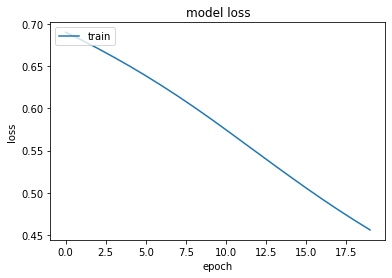

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Here we converted the code to a function so we can use it later as well
plt.style.use('ggplot')

def plot_history(history, val=0):
    acc = history.history['accuracy']
    if val == 1:
        val_acc = history.history['val_accuracy'] # we can add a validation set in our fit function with nn
    loss = history.history['loss']
    if val == 1:
        val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    if val == 1:
        plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    if val == 1:
        plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Loss')
    plt.legend()

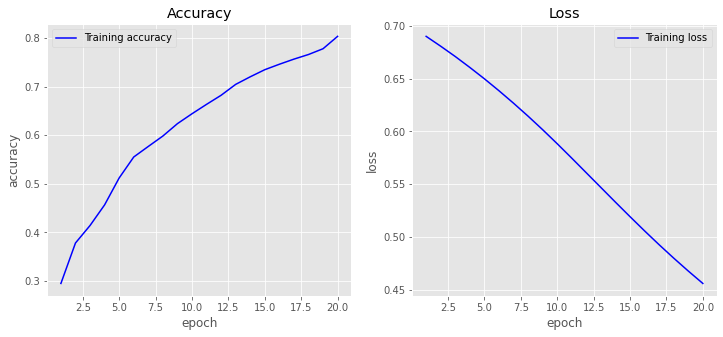

In [ ]:
plot_history(history)

10. Evaluate the accuracy of your trained model on the test set. Compare that with the accuarcy of train.

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accuracy))

62/62 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.6966
Test set
  Loss: 0.471
  Accuracy: 0.697


You can already see that the model was overfitting since it reached over 95% accuracy for the training set. When training a model, you can use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

## The embedding layer
Here we want to create a sequentional model with an embedding layer as the input layer and dense layer as the next layers. To do this first we need to apply the tokenizer from Keras and convert text data into sequences to be ready for the embedding layer.

11. Use the tokenizer from Keras with 20000 words and create X-train and X_test sequences.

In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df_train.text.values)

In [ ]:
X_train = tokenizer.texts_to_sequences(df_train.text.values)
X_test = tokenizer.texts_to_sequences(df_test.text.values)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for sequence padding
vocab_size

38111

Note that the a document-term matrix uses vectors of word counts, and each vector has the same length (the size of the total corpus vocabulary). With Keras Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

In [ ]:
for word in ['the', 'all', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 35
happy: 1043
sad: 3422


12. Use the pad_sequence() function to pad each text sequence with zeros, so that each vector has the same length of 100 words.

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
print(X_train[0, :])

[  555 12221    23    75  1507   379    23    16 15253     3   621    63
  5371 10293    73  2745     5   246   686     2 10294     2  2340     4
  3927     6   332  4110  1290     3 12222   131    37     2     1    72
  7235    34   177    21     7  3928     4    33    16    35    86 12223
  3226     4    23   241   753     3 12222     3    47    38  7953    42
     4    93    17   364     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


Typically it does not matter whether you prepend or append zeros. The first values represent the index in the vocabulary, and the rest are zeros from sequence padding, since you have a short document.

13. Now it is time to create a neural network model using an embedding layer as input. Take the output of the embedding layer (embedding_dim = 50) and plug it into a Dense layer with 10 neurons, and the relu activation function. In order to do this, you have to add a Flatten layer in between that prepares the sequential input for the Dense layer. Note that in the Embedding layer, input_dim is the size of the vocabulary, output_dim is the size of the embedding vector, and input_length is the length of the text sequence.

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1905550   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
Total params: 1,955,615
Trainable params: 1,955,615
Non-trainable params: 0
_________________________________________________________________


You can now see that we have 1905550 new parameters to train. This number comes from vocab_size (38111) times the embedding_dim (50). These weights of the embedding layer are randomly initialized and then are adjusted through backpropagation during training. This model takes the words as they come in the order of the sentences as input vectors.

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=64)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9772
Testing Accuracy:  0.7926


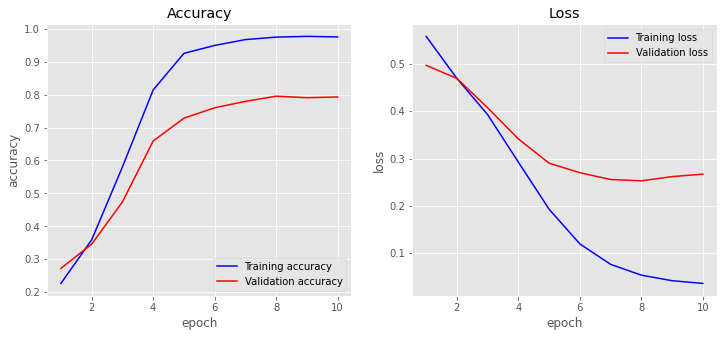

In [ ]:
plot_history(history, val=1)

14. Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. You can think of the pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors. Use a GlobalMaxPool1D layer after the embedding layer and create a new model. Does the performance change?

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           1905550   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 1,906,115
Trainable params: 1,906,115
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9395
Testing Accuracy:  0.7559


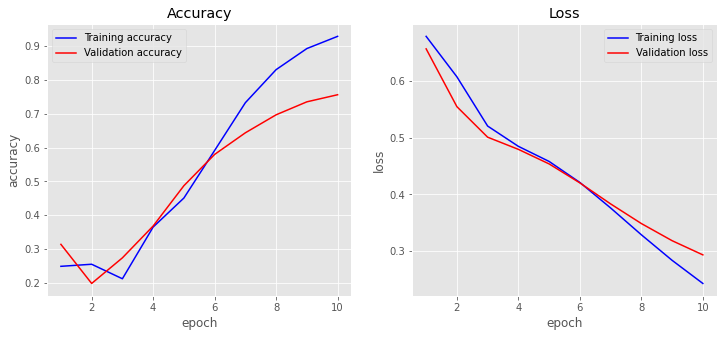

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history, val=1)

Pretrained word embeddings
15. Pretrained word embeddings are the embeddings learned in one task that are used for solving another similar task. These embeddings are trained on large data sets, saved, and then used for solving other tasks. Here, we are going to use the GloVe embeddings which are precomputed word embeddings simply trained on a large corpus of text. For this purpose, we wrote the following fuction to apply on the pretrained word embeddings and use the corresponding word vectors for words in our vocabulary. Download one of the GloVe embeddings (e.g. glove.6B.50d.txt) and create the embedding matrix using the provided function. (Link to download: https://nlp.stanford.edu/projects/glove/)

In [ ]:
filpathGloveData = '/content/drive/MyDrive/Colab Notebooks/AppliedTextMiningSummerschoolUtrechtJuly2021/glove.6B.50d.txt'

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/Colab Notebooks/AppliedTextMiningSummerschoolUtrechtJuly2021/glove.6B.50d.txt',
                                           tokenizer.word_index, embedding_dim)

In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.7771771929364225

16. Build your previous previous neural network model again, but this time with the initial weights from the pretrained word embeddings. Set the trainable argument False so that your embedding layer does not learn the word vectors anymore, and then again back to True. How does the performances change?

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           1905550   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
Total params: 1,906,115
Trainable params: 565
Non-trainable params: 1,905,550
_________________________________________________________________


Training Accuracy: 0.8113
Testing Accuracy:  0.7840


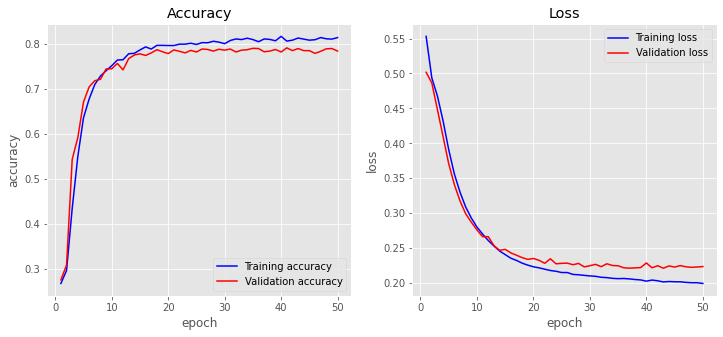

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history, val=1)

Since the word embeddings are not additionally trained, it is expected to be lower. But let’s now see how this performs if we allow the embedding to be trained by using trainable=True:

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           1905550   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
Total params: 1,906,115
Trainable params: 1,906,115
Non-trainable params: 0
_________________________________________________________________


Because it is a multiclass classification problem, log loss is used as the loss function (categorical_crossentropy in Keras). The efficient ADAM optimization algorithm is used. The model is fit for 50 epochs. A large batch size of 64 reviews is used to space out weight updates.

Training Accuracy: 0.9803
Testing Accuracy:  0.8539


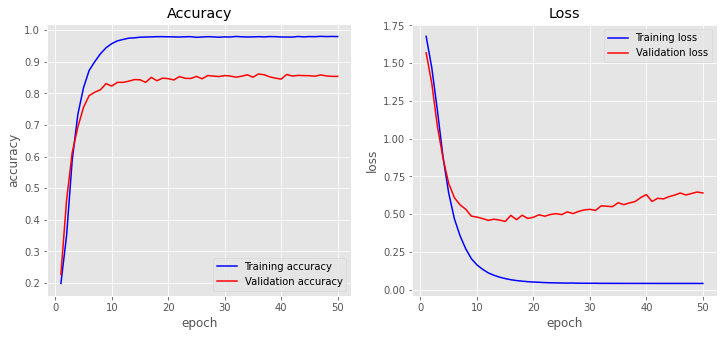

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history, val=1)